# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** Несмещённые оценки: $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ (проверить несмещённость можно тривиальным подсчётом мат. ожидания)

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [5]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

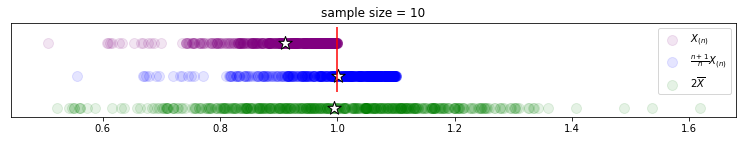

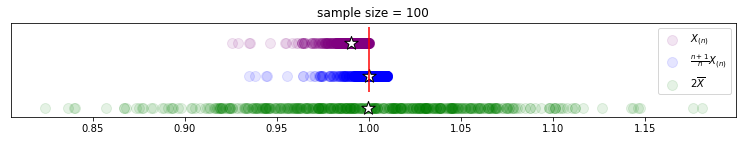

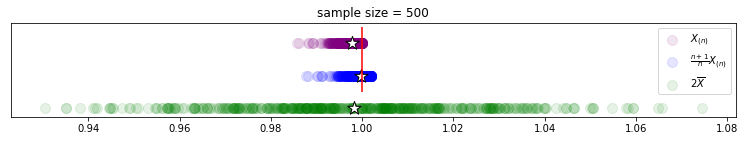

In [17]:
samples_amount = 500
arr = [10, 100, 500]
evaluations = [(lambda X: np.max(X, axis=1), '$X_{(n)}$', 0, 'purple'),
               (lambda X: (X.shape[1] + 1)/X.shape[1] * np.max(X, axis=1), 
                '$\\frac{n+1}{n}X_{(n)}$', -2, 'blue'),
               (lambda X: 2 * np.mean(X, axis=1), '$2\overline{X}$', -4, 'green')]
# Для каждой оценки:
for i, n in enumerate(arr):
    plt.figure(figsize=(13, 10))
    samples = sps.uniform.rvs(size=(samples_amount, n))
    plt.subplot(5, 1, i + 1)
    for func, label, level, color in evaluations:
        plt.scatter(func(samples), np.zeros_like(samples[:, 0]) + level, 
            alpha=0.1, s=100, color=color, label=label)
        plt.scatter(func(samples).mean(), level, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
    plt.vlines(1, -len(evaluations), 1, color='r')
    plt.title('sample size = ' + str(n)) #размер выборки
    plt.yticks([])
    plt.legend()
plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n}{n-1}S^2$ (проверяется аналогично)

Для данной модели выполните те же действия, что и с предыдущей.

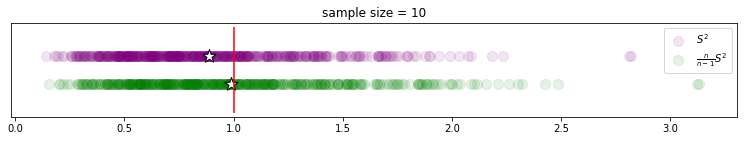

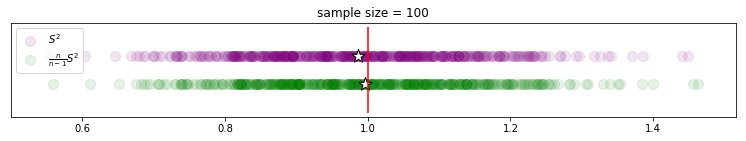

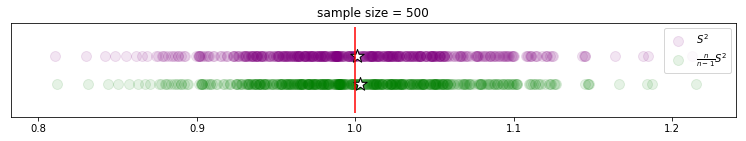

In [32]:
samples_amount = 500
arr = [10, 100, 500]
evaluations = [
    (lambda X: np.mean(X*X, axis=1) - np.mean(X, axis=1)**2, '$S^2$', 0, 'purple'),
    (lambda X: (np.mean(X*X, axis=1) - np.mean(X, axis=1)**2) * n / (n - 1), '$\\frac{n}{n-1}S^2$', -1, 'green')
]
# Для каждой оценки:
for i, n in enumerate(arr):
    plt.figure(figsize=(13, 10))
    samples = sps.norm.rvs(size=(samples_amount, n))
    plt.subplot(5, 1, i + 1)
    for func, label, level, color in evaluations:
        plt.scatter(func(samples), np.zeros_like(samples[:, 0]) + level, 
            alpha=0.1, s=100, color=color, label=label)
        plt.scatter(func(samples).mean(), level, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
    plt.vlines(1, -len(evaluations), 1, color='r')
    plt.title('sample size = ' + str(n)) #размер выборки
    plt.yticks([])
    plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Полученные графики подтвердили несмещённость оценки: мат ожидание совпадает со значением параметра. 
В лабораторных по физике при оценке погрешности при небольшом количестве измерений (обычно n < 10) используют (n - 1) в знаменателе, чтобы не завышать искусственно точность измерений, так как при таком количестве измерений погрешность большая.

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

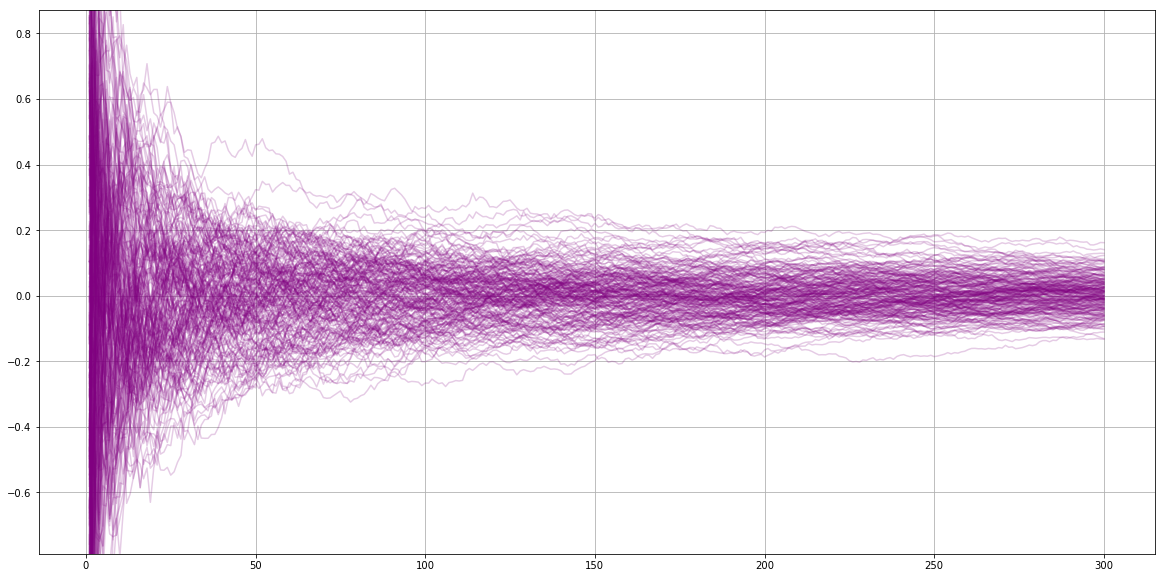

In [91]:
# Пункт а

samples_amount = 200
n = 300
samples = sps.norm.rvs(size=(samples_amount, n))
params = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
plt.figure(figsize=(20, 10))
for i in range(samples_amount):
    plt.plot(np.arange(1, n + 1), params[i], alpha=0.2, color='purple')
plt.ylim(np.min(samples) / 5, np.max(samples) / 5)
plt.grid()
plt.show()

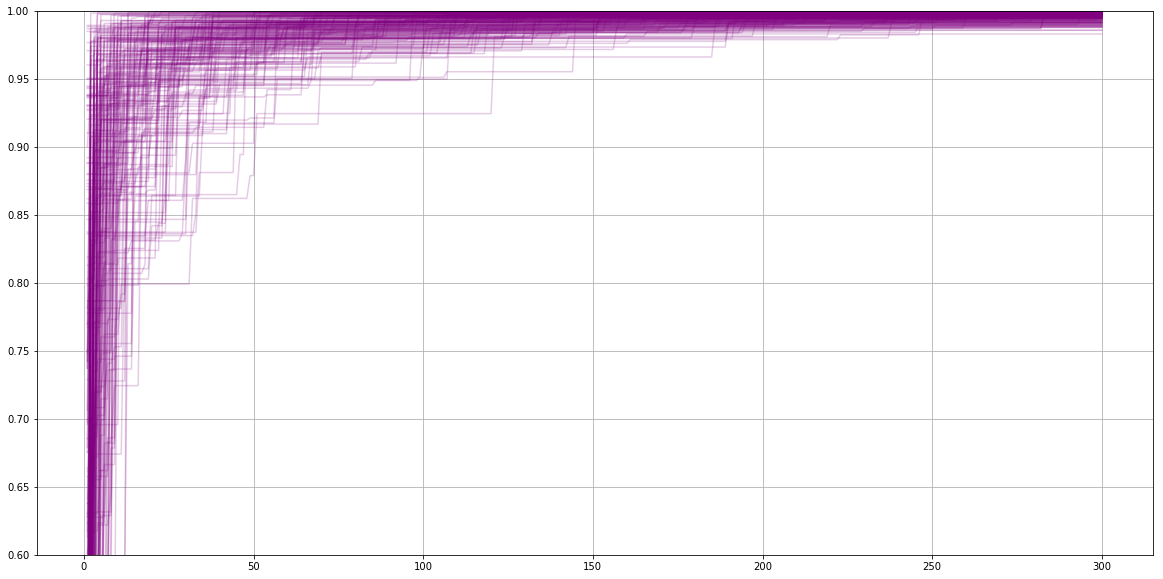

In [90]:
# Пункт b

samples_amount = 200
n = 300
samples = sps.uniform.rvs(size=(samples_amount, n))
params = np.maximum.accumulate(samples, axis=1)
plt.figure(figsize=(20, 10))
for i in range(samples_amount):
    plt.plot(np.arange(1, n + 1), params[i], alpha=0.2, color='purple')
plt.ylim(np.min(samples) + 0.6, np.max(samples))
plt.grid()
plt.show()

**Вывод:** Состоятельная оценка — это точечная оценка, сходящаяся по вероятности 
к оцениваемому параметру.
Данные графики подтверждают состоятельность выбранных оценок: при увеличении 
n, значение оценки всё больше сходится к параметру.
Связь пункта $\bf{a)}$ и ЗБЧ: оценка является состоятельной при $\delta = 0.5$

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

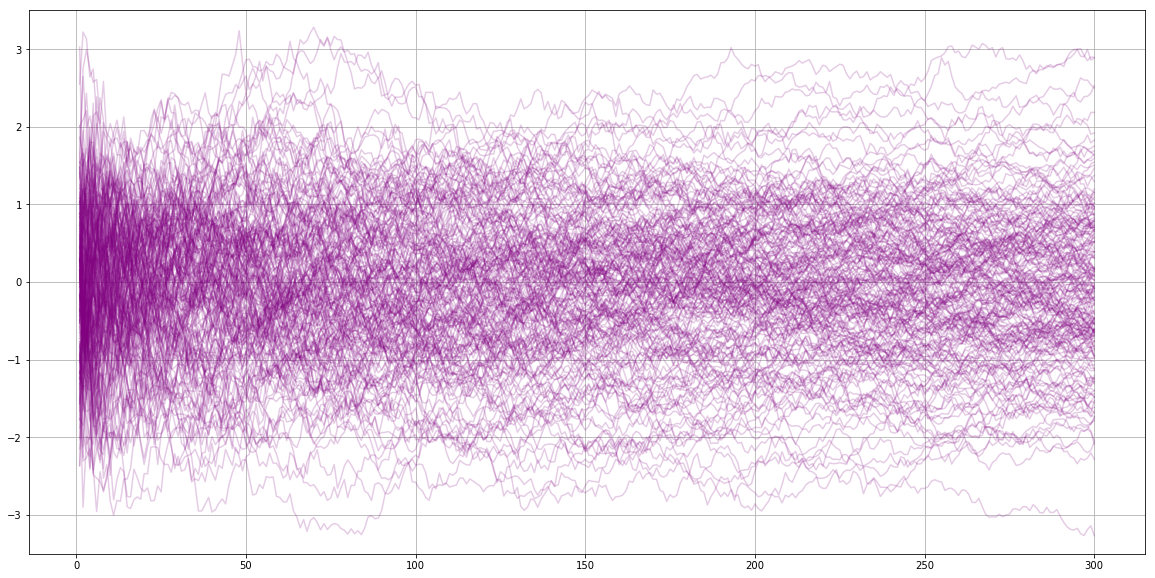

In [89]:
# Пункт а

samples_amount = 200
n = 300
theta = 0
samples = sps.norm.rvs(size=(samples_amount, n))
params = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
stats = np.sqrt(np.arange(1, n + 1)) * (params - theta)
plt.figure(figsize=(20, 10))
for i in range(samples_amount):
    plt.plot(np.arange(1, n + 1), stats[i], alpha=0.2, color='purple')
    
# plt.ylim(np.min(samples) / 10, np.max(samples) / 10)
plt.ylim((-3.5, 3.5))
plt.grid()
plt.show()

In [95]:
import sklearn.neighbors as skn

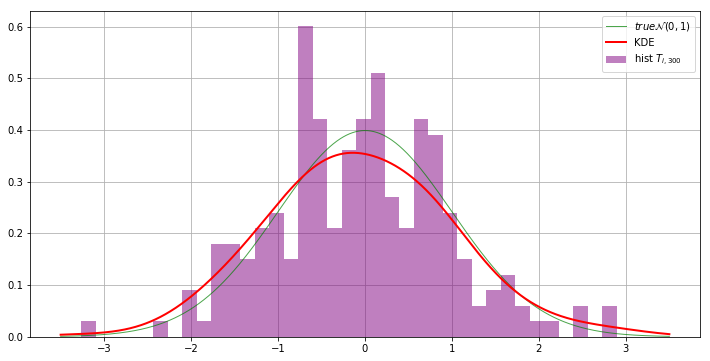

In [107]:
theta_sample = stats[:, -1]
x = np.linspace(-3.5, 3.5, 1000)
kernel_density = skn.KernelDensity(kernel='gaussian', bandwidth=0.5)
kernel_density.fit(theta_sample[:, np.newaxis])
plt.figure(figsize=(12, 6))
plt.axes(axisbelow=True)
plt.hist(theta_sample, bins=37, normed=True, alpha=0.5, color='purple', label='hist $T_{i,300}$')
plt.plot(x, sps.norm.pdf(x), color='green', linewidth=1, alpha=0.7, label='$true \\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), linewidth=2, color='red', label='KDE')
plt.legend()
plt.grid()
plt.show()

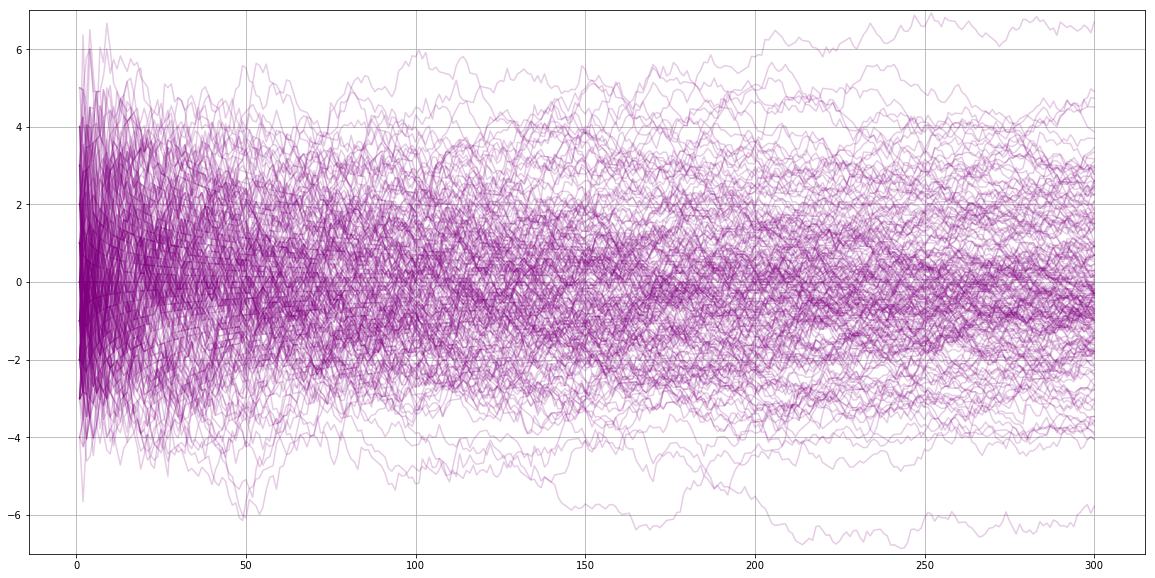

In [111]:
# Пункт b

samples_amount = 200
n = 300
theta = 4
samples = sps.poisson(mu=theta).rvs(size=(samples_amount, n))
params = np.cumsum(samples, axis=1) / np.arange(1, n + 1)
stats = np.sqrt(np.arange(1, n + 1)) * (params - theta)
plt.figure(figsize=(20, 10))
for i in range(samples_amount):
    plt.plot(np.arange(1, n + 1), stats[i], alpha=0.2, color='purple')
    
# plt.ylim(np.min(samples) / 10, np.max(samples) / 10)
plt.ylim((-7, 7))
plt.grid()
plt.show()

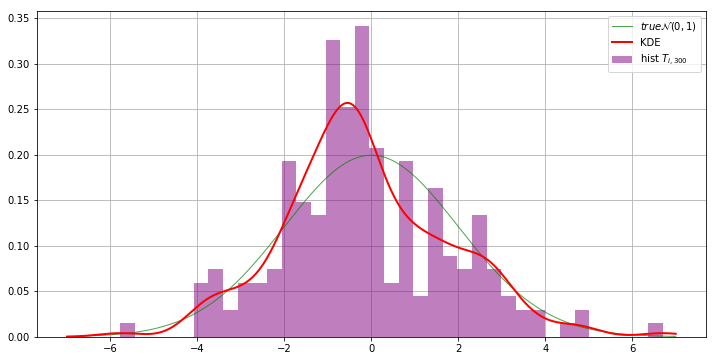

In [116]:
theta_sample = stats[:, -1]
x = np.linspace(-7, 7, 1000)
kernel_density = skn.KernelDensity(kernel='gaussian', bandwidth=0.5)
kernel_density.fit(theta_sample[:, np.newaxis])
plt.figure(figsize=(12, 6))
plt.axes(axisbelow=True)
plt.hist(theta_sample, bins=37, normed=True, alpha=0.5, color='purple', label='hist $T_{i,300}$')
plt.plot(x, sps.norm.pdf(x, scale=theta**0.5), color='green', linewidth=1, alpha=0.7, label='$true \\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), linewidth=2, color='red', label='KDE')
plt.legend()
plt.grid()
plt.show()

**Вывод :** 
Асимптотически нормальная оценка - оценка, распределение которой стремится к нормальному при увеличении размера выборки.

Как мы увидели,  $\sqrt{n} \left( \widehat{\theta} - \theta \right)$ распределена так же, как и  $\mathcal{N}(a, \sigma^2)$. Из этого можно сделать вывод, что $\widehat{\theta}$ асимптотически нормальна

По центральной предельной теореме для распределения Пуассона:  $\sqrt{n} \left( \widehat{\theta} - \theta \right) \stackrel{d_\theta}{\longrightarrow} \mathcal{N}(0, \theta^2)$ (это мы и увидели на графиках)

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

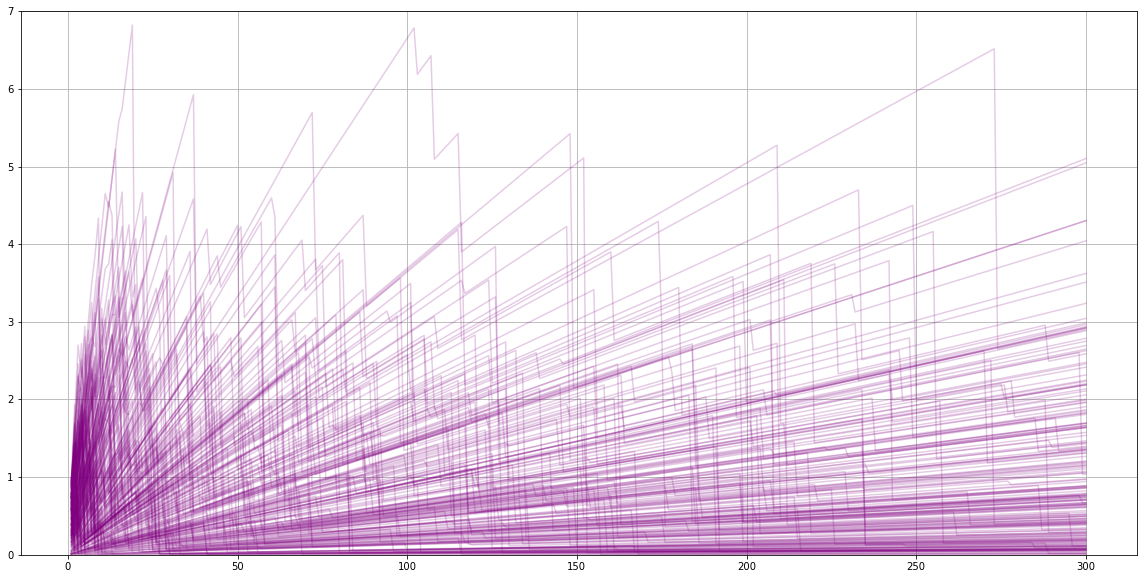

In [121]:
samples_amount = 200
n = 300
theta = 1
samples = sps.uniform.rvs(size=(samples_amount, n))
params = np.arange(1, n + 1) * (theta - np.maximum.accumulate(samples, axis=1))

plt.figure(figsize=(20, 10))
for i in range(samples_amount):
    plt.plot(np.arange(1, n + 1), params[i], alpha=0.2, color='purple')
    
plt.ylim((0, 7))
plt.grid()
plt.show()

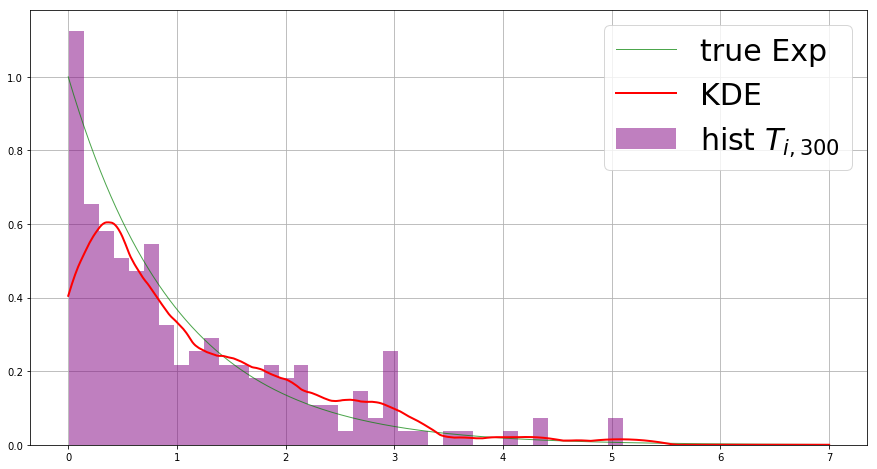

In [133]:
x = np.linspace(0, 7, 1000)
kernel_density = skn.KernelDensity(kernel='epanechnikov', bandwidth=0.5)
kernel_density.fit(params[:, -1][:, np.newaxis])
plt.figure(figsize=(15, 8))
plt.axes(axisbelow=True)
plt.hist(params[:, -1], bins=37, normed=True, alpha=0.5, color='purple', label='hist $T_{i,300}$')
plt.plot(x, sps.expon(scale=1/theta).pdf(x), color='green', linewidth=1, alpha=0.7, label='true Exp')
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), linewidth=2, color='red', label='KDE')
plt.legend(fontsize=30)
plt.grid()
plt.show()

**Вывод :** 
Как мы увидели,  $n\left(\theta - X_{(n)}\right)$ распределена так же, как и $Exp\left(1/\theta\right)$.

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [134]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        # likelihood = значение функции правдоподобия
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

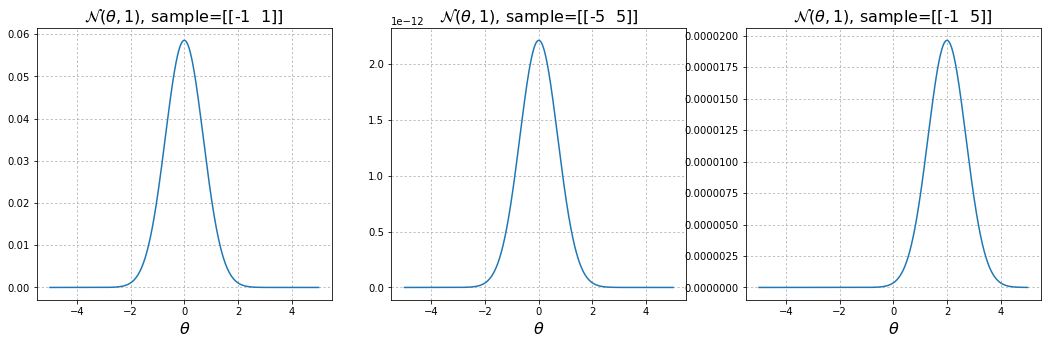

In [135]:
# Пункт a (нормальное)
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

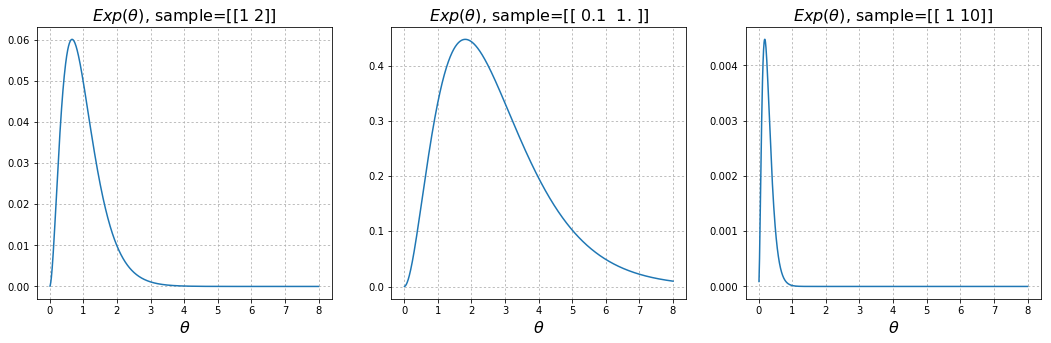

In [146]:
# Пункт b (экспоненциальное)
grid = np.linspace(0.01, 8, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid,
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

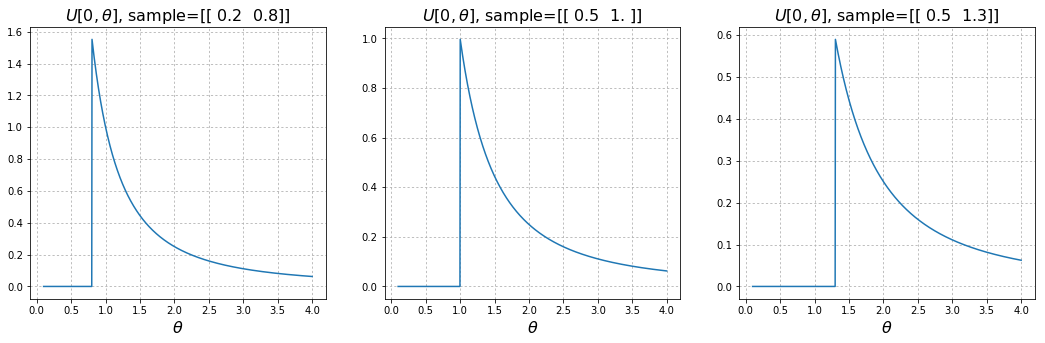

In [148]:
# Пункт c (равномерное)

grid = np.linspace(0.1, 4, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

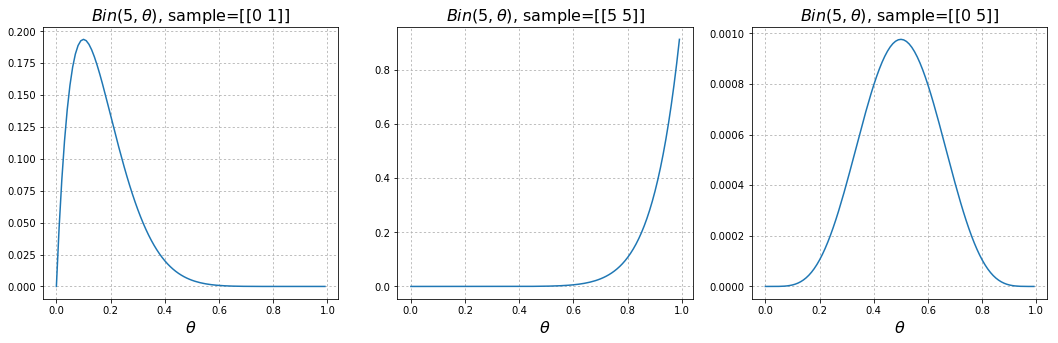

In [150]:
# Пункт d (биномиальное)

grid = np.linspace(0, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

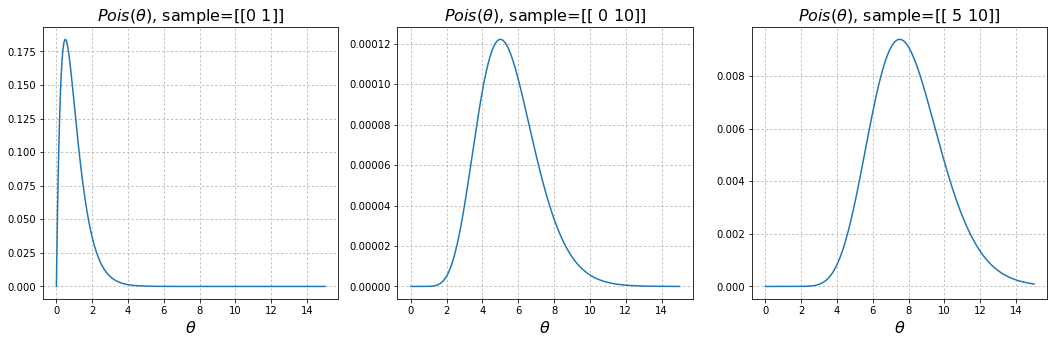

In [151]:
# Пункт e (пуассоновское)

grid = np.linspace(0, 15, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

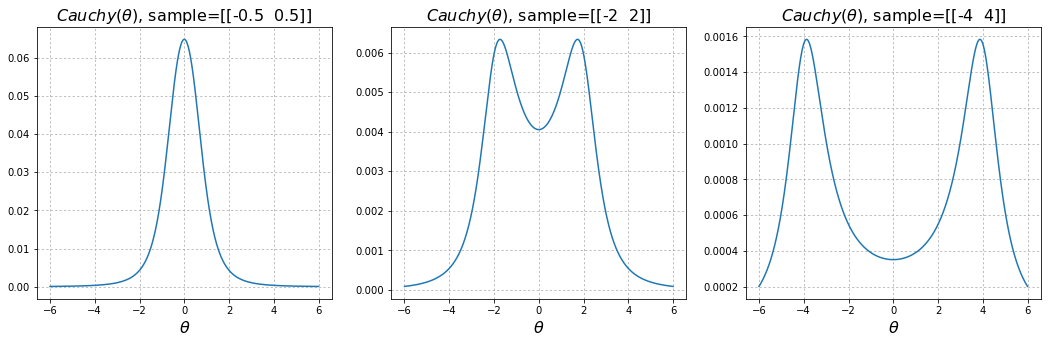

In [152]:
# Пункт e (Коши)

grid = np.linspace(-6, 6, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 4]], '$Сauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** 
По графикам можно понять, что график функции тем больше похож на график истинной плотности распределения, чем больше значений выборки лежат в наиболее плотных интервала правдивой плотности

Функция правдоподобия не является плотностьюх хотя бы потому, что она не зависит от выборки(а только от параметра).

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [136]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

Результат отличался, потому что результатом является логарифм функции правдоподобия

In [154]:
sample = sps.norm.rvs(size=10**5)
likelihood = np.sum(sps.norm.logpdf(sample))
print(likelihood)

-142133.031463


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

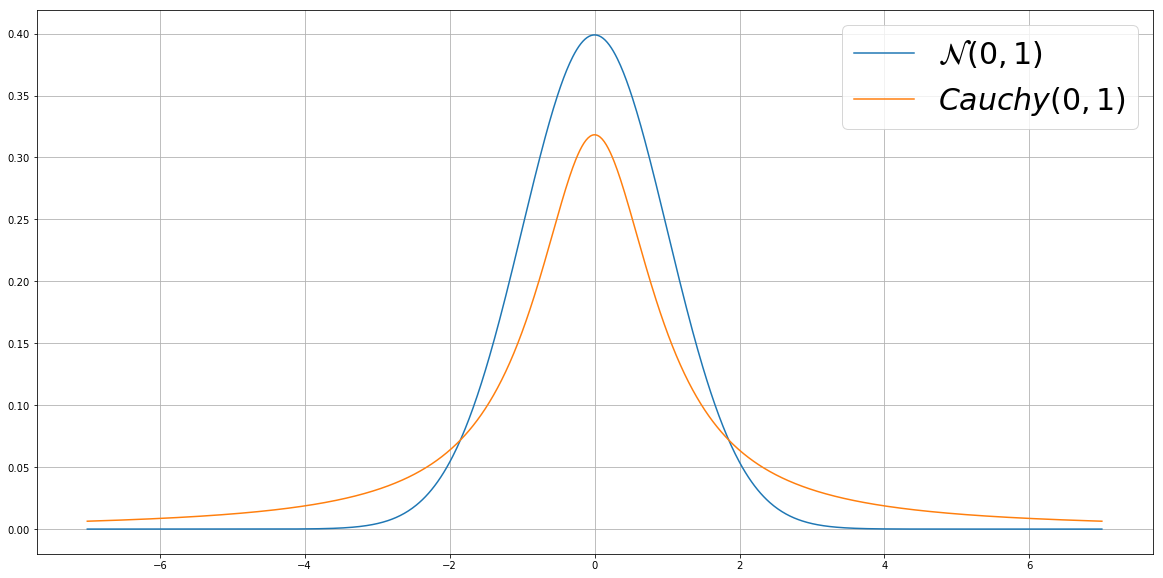

In [160]:
# Пункт a

grid = np.linspace(-7, 7, 1000)
plt.figure(figsize=(20, 10))
plt.plot(grid, sps.norm.pdf(grid), label='$\mathcal{N}(0, 1)$')
plt.plot(grid, sps.cauchy.pdf(grid), label='$Cauchy(0, 1)$')

plt.legend(fontsize=30)
plt.grid()
plt.show()

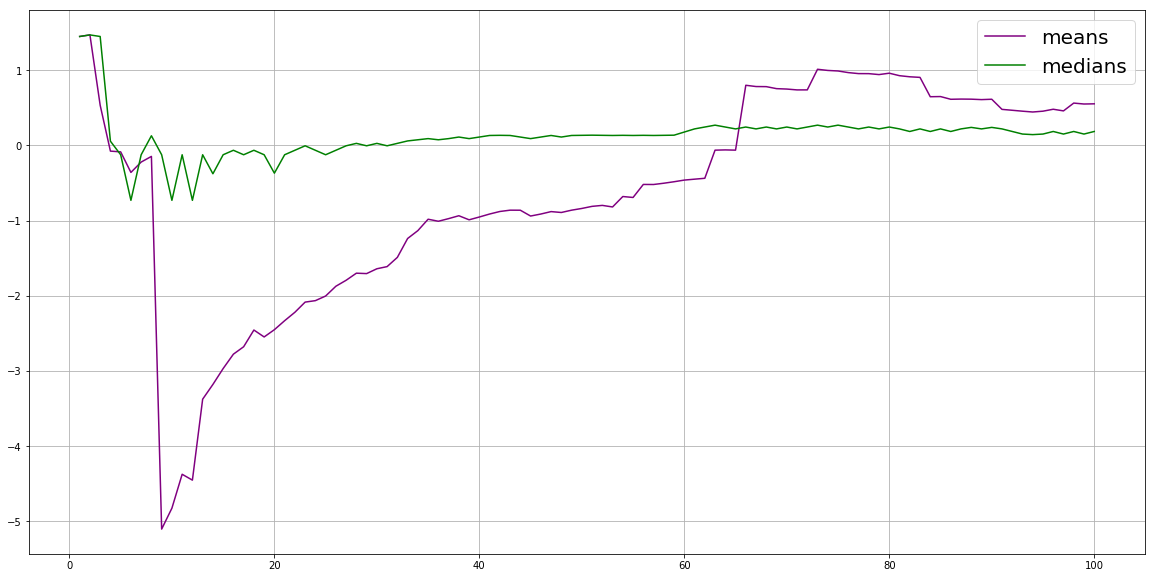

In [175]:
# Пункт b

n = 100
arr = np.arange(1, n + 1)
sample = sps.cauchy.rvs(size=n)
means = np.cumsum(sample) / arr
medians = np.array([np.median(sample[:i]) for i in arr])
plt.figure(figsize=(20, 10))
plt.plot(arr, means, 'purple', label='means')
plt.plot(arr, medians, 'green', label='medians')

plt.legend(fontsize=20)
plt.grid()
plt.show()

**Вывод:** Так как распределение Коши довольно "широкое" (сильно отходит от мат ожидания, в отличии от нормального распределения), то часто среднее значение получается не очень точным, так как среднее значение довольно сильно реагирует на выбросы. Поэтому лучше использовать медиану в качестве оценки параметра

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [ ]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

In [176]:
# Возьмём скорость ветра за март - май и половину июня 1997 года в
# Магнитогорск с этого сайта 
# http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind.html

wind_speeds = [
    1.2, 6.1, 4.4, 15.2, 7.8, 7.8, 0.2, 8, 16, 8, 7.2, 14.7, 15.8, 13.1, 13.8,
    5.1, 4.2, 4.6, 4.2, 3.2, 1.5, 3.6, 1.1, 7.8, 7.3, 8.7, 12.2, 5.5, 6.1, 4.2,
    9.7, 15.3, 12.4, 3.4, 6.6, 12.1, 9.5, 1.5, 11.4, 16.1, 21.6, 15.1, 17.7,
    4.6, 5.6, 17.2, 8.7, 3.4, 3.9, 1.9, 10.7, 9.7, 15.5, 3.2, 9.7, 4.9, 3.6, 6.6,
    7.4, 8, 8.5, 4.6, 2.9, 2.9, 10.9, 12.4, 12.9, 5.5, 4.2, 6.1, 3.6, 5.3, 5,
    8.6, 5.1, 3.2, 10.4, 10, 5.8, 10.7, 9.7, 3.4, 4.2, 3.4, 3.2, 4.1, 5.8, 4.2, 
    8, 7.3, 2.9, 3.2, 7, 9.2, 6.9, 8.5, 10, 4.6, 3.4, 8.5, 6.3, 6.4, 2.9, 6.1,
    4.9, 6.4
]

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [ ]:
plt.plot(тета, функция риска, label=latex-метка)
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title(тип функции потерь, fontsize=16)
plt.ylim((0, ограничение сверху))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.